In [34]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("../../Model/cleaned_dataset.csv")
backup_data = pd.read_csv("../../Model/cleaned_dataset.csv")

In [35]:
import numpy as np

# Detect outliers using the IQR method
for col in ['Mileage', 'Horse Power', 'Age', 'Price']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Data Shape After Outlier Removal:", data.shape)

Data Shape After Outlier Removal: (4285, 13)


In [36]:
data.shape

(4285, 13)

In [37]:
data.drop(columns=['Posting Month'])
X = data.drop(columns=['Price','Posting Month'])  
y = data['Price']

In [38]:
X.shape, y.shape

((4285, 11), (4285,))

In [39]:
categorical_columns = ['Manufacturer', 'Model', 'Transmission', 'Fuel', 'country_of_origin']
numerical_columns = ['Horse Power', 'Mileage', 'Posting Year', 'Age', 'price_per_km', 'price_per_horsepower']

In [40]:
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns),  # Encode categorical features
    ],
    remainder='passthrough'  # Pass numerical features as-is
)

In [41]:
X_encoded = ct.fit_transform(X)

In [42]:
encoded_feature_names = (
    ct.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist()
    + numerical_columns
)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3428, 574), (857, 574), (3428,), (857,))

------------------------------------------------------------------------------

----------------------------------RL--------------------------------------------

In [45]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [46]:
y_test.shape

(857,)

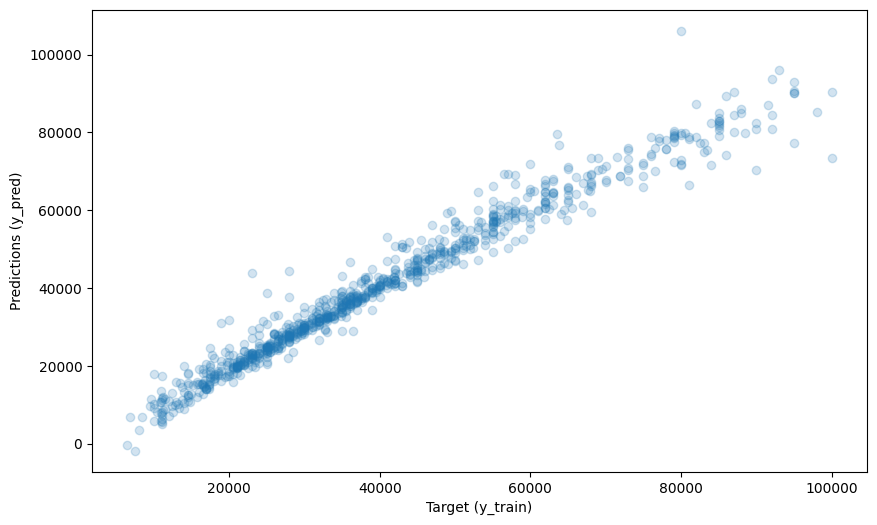

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.2)  
plt.xlabel('Target (y_train)') 
plt.ylabel('Predictions (y_pred)')
plt.show()

C:\Users\Msi Rtx\AppData\Local\Temp\ipykernel_12944\3365905431.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='Price', ylabel='Density'>

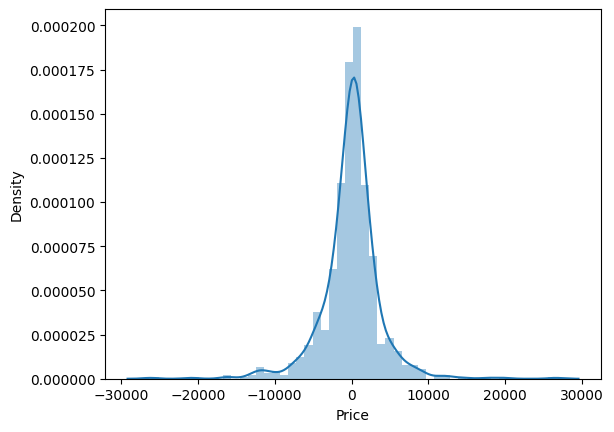

In [54]:
import seaborn as sns

sns.distplot(y_test-y_pred)

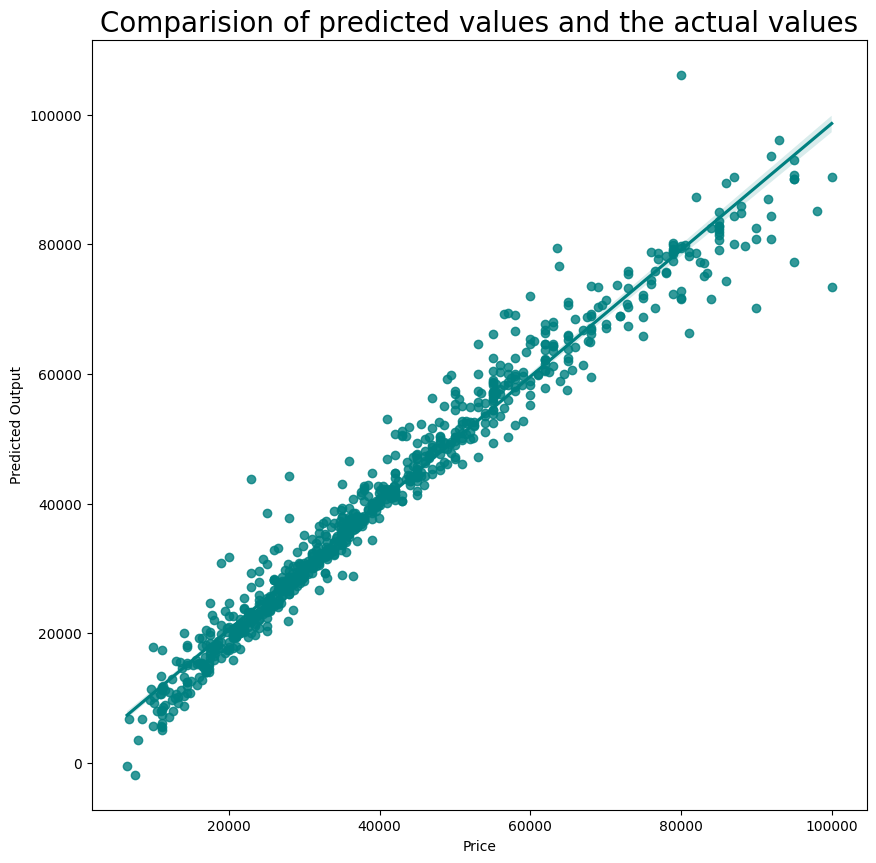

In [53]:
import seaborn as sns

y_predict = pd.DataFrame(y_pred, columns = ['Predicted Output'])

results = pd.concat([y_predict, y_test.reset_index(drop = True)], axis = 1, ignore_index = False)

plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'Price', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


mae_new = mean_absolute_error(y_test, y_pred)
mse_new = mean_squared_error(y_test, y_pred)
r2_new = r2_score(y_test, y_pred)

print(f"MAE après suppression: {mae_new}")
print(f"MSE après suppression: {mse_new}")
print(f"R² après suppression: {r2_new}")

MAE après suppression: 2418.288454002479
MSE après suppression: 14624129.138332063
R² après suppression: 0.9635259848799326


In [59]:
from sklearn.linear_model import LinearRegression

# Fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


pd.DataFrame(X_train)
# Get coefficients
coefficients = pd.DataFrame({
    'Feature': pd.DataFrame(X_train).columns,
    'Coefficient': lr_model.coef_
})

# Sort by absolute value of coefficients and get top 3 features
top_3_features = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index).head(3)
print(top_3_features)


     Feature   Coefficient
343      343 -22147.050933
522      522 -19801.931377
139      139  17015.229826


In [49]:
print("Data Shape After Outlier Removal:", data.shape)

Data Shape After Outlier Removal: (4285, 13)
